# Ensembling of simple CNN models to get best possible accuracy for MNIST fashion dataset(Report 3, without batch normalization)

Importing required libraries

In [1]:
import tensorflow as tf
from numpy import unique, argmax
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np   


Loading the MNIST fashion dataset and reshaping the training and testing images 

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

4431872/4422102 [==============================] - 0s 0us/step


Shape of input, output training and testing images

In [3]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))


Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


Normalization of input images 

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

Label number & respective images 

Label        	Description

0	  -T-shirt/top

1-Trowser

2-	Pullover

3-	Dress

4-	Coat

5	-Sandal

6-	Shirt

7	-Sneaker

8-	Bag

9-	Ankle Boot

visualization of input images from training mnist fashion dataset

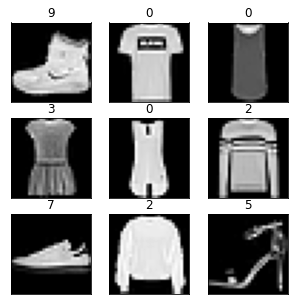

In [5]:
fig = plt.figure(figsize=(5,5))
for i in range(9):
  ax = fig.add_subplot(3,3, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])


Model 1 (Name-M3, boz of 3*3 kernel size ), having 10 conv. layers followed by final output layer and no batch normalization 

In [8]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
# model1.add(BatchNormalization())


model1.add(Conv2D(48, (3,3), activation='relu'))
# model1.add(BatchNormalization())


model1.add(Conv2D(64, (3,3), activation='relu'))
# model1.add(BatchNormalization())


model1.add(Conv2D(80, (3,3), activation='relu'))
# model1.add(BatchNormalization())



model1.add(Conv2D(96, (3,3), activation='relu'))
# model1.add(BatchNormalization())



model1.add(Conv2D(112, (3,3), activation='relu'))
# model1.add(BatchNormalization())



model1.add(Conv2D(128, (3,3), activation='relu'))
# model1.add(BatchNormalization())


model1.add(Conv2D(144, (3,3), activation='relu'))
# model1.add(BatchNormalization())


model1.add(Conv2D(160, (3,3), activation='relu'))
# model1.add(BatchNormalization())



model1.add(Conv2D(176, (3,3), activation='relu'))
# model1.add(BatchNormalization())



model1.add(Flatten())

model1.add(Dense(10, activation='softmax'))


Compiling the model 1 ,summary and model 1 architecture  

Epoch 1/5
268/268 - 36s - loss: 0.2973 - accuracy: 0.8905 - 36s/epoch - 134ms/step
Epoch 2/5
268/268 - 35s - loss: 0.2810 - accuracy: 0.8962 - 35s/epoch - 131ms/step
Epoch 3/5
268/268 - 35s - loss: 0.2737 - accuracy: 0.8989 - 35s/epoch - 131ms/step
Epoch 4/5
268/268 - 35s - loss: 0.2610 - accuracy: 0.9043 - 35s/epoch - 130ms/step
Epoch 5/5
268/268 - 35s - loss: 0.2519 - accuracy: 0.9078 - 35s/epoch - 130ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 48)        13872     
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 64)        27712     
                                                                 
 conv2d_13 (Conv2D)          (None,

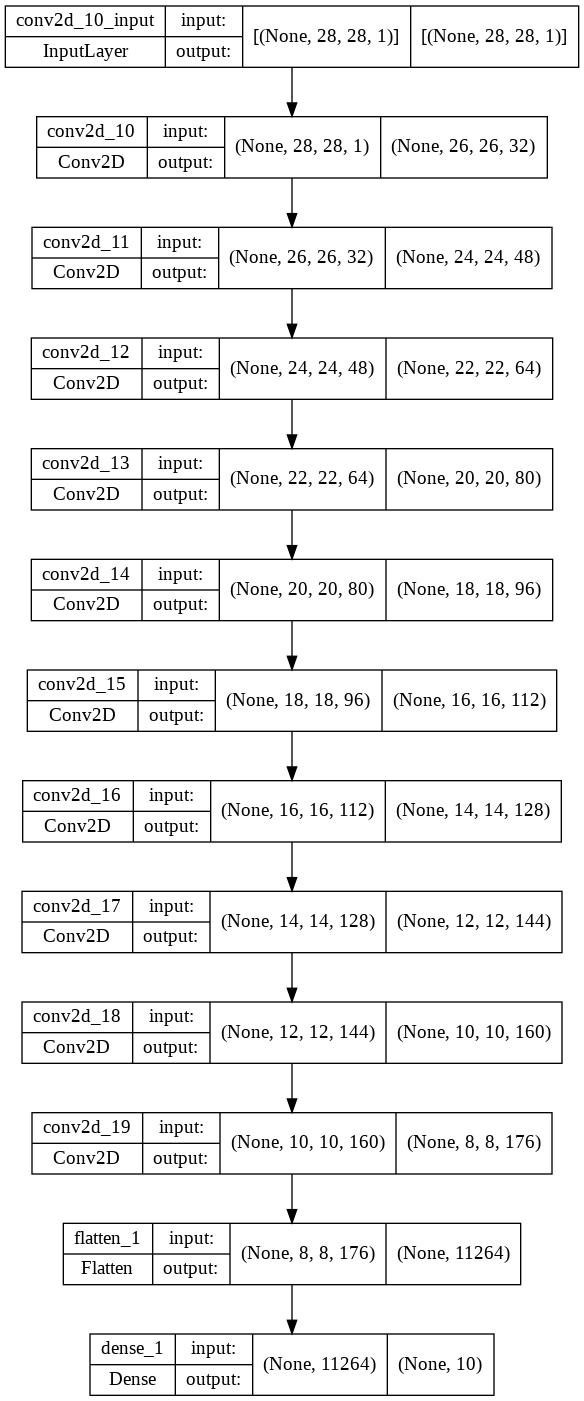

In [14]:
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=5, batch_size=224, verbose=2, validation_split=None)

model1.summary()
model1.save('saved_models/model1.hdf5')
plot_model(model1, 'model1.jpg', show_shapes=True)

Model 2 (Name-M5, boz of 5*5 kernel size ), having 5 conv. layers followed by final output layer and no batch normalization 

In [15]:
model2 = Sequential()

model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
# model2.add(BatchNormalization())


model2.add(Conv2D(64, (5,5), activation='relu'))
# model2.add(BatchNormalization())


model2.add(Conv2D(96, (5,5), activation='relu'))
# model2.add(BatchNormalization())


model2.add(Conv2D(128, (5,5), activation='relu'))
# model2.add(BatchNormalization())



model2.add(Conv2D(160, (5,5), activation='relu'))
# model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))



Compiling the model 2 ,summary and model 2 architecture

Epoch 1/5
264/264 - 18s - loss: 0.2789 - accuracy: 0.8973 - 18s/epoch - 69ms/step
Epoch 2/5
264/264 - 18s - loss: 0.2692 - accuracy: 0.9021 - 18s/epoch - 67ms/step
Epoch 3/5
264/264 - 18s - loss: 0.2609 - accuracy: 0.9044 - 18s/epoch - 67ms/step
Epoch 4/5
264/264 - 18s - loss: 0.2541 - accuracy: 0.9063 - 18s/epoch - 67ms/step
Epoch 5/5
264/264 - 18s - loss: 0.2396 - accuracy: 0.9122 - 18s/epoch - 67ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_21 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 96)        153696    
                                                                 
 conv2d_23 (Conv2D)          (None, 12, 

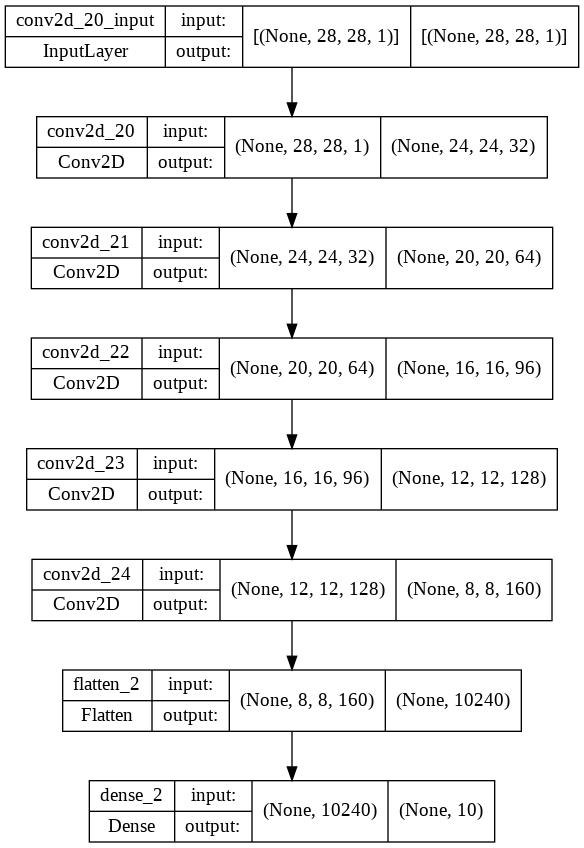

In [22]:
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=228, verbose=2, validation_split=None)

model2.summary()
model2.save('saved_models/model2.hdf5')
plot_model(model2, 'model2.jpg', show_shapes=True)

Model 3 (Name-M7, boz of 7*7 kernel size ), having 4 conv. layers followed by final output layer and no batch normalization 

In [23]:
model3 = Sequential()

model3.add(Conv2D(48, (7,7), activation='relu', input_shape=(28,28,1)))
# model3.add(BatchNormalization())


model3.add(Conv2D(96, (7,7), activation='relu'))
# model3.add(BatchNormalization())


model3.add(Conv2D(144, (7,7), activation='relu'))
# model3.add(BatchNormalization())


model3.add(Conv2D(192, (7,7), activation='relu'))
# model3.add(BatchNormalization())

model3.add(Flatten())

model3.add(Dense(10, activation='softmax'))



Compiling the model 3 ,summary and model 3 architecture

Epoch 1/5
264/264 - 19s - loss: 0.3146 - accuracy: 0.8856 - 19s/epoch - 71ms/step
Epoch 2/5
264/264 - 18s - loss: 0.2962 - accuracy: 0.8914 - 18s/epoch - 67ms/step
Epoch 3/5
264/264 - 18s - loss: 0.2834 - accuracy: 0.8985 - 18s/epoch - 67ms/step
Epoch 4/5
264/264 - 18s - loss: 0.2708 - accuracy: 0.9024 - 18s/epoch - 67ms/step
Epoch 5/5
264/264 - 18s - loss: 0.2581 - accuracy: 0.9052 - 18s/epoch - 67ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 22, 22, 48)        2400      
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 96)        225888    
                                                                 
 conv2d_27 (Conv2D)          (None, 10, 10, 144)       677520    
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4

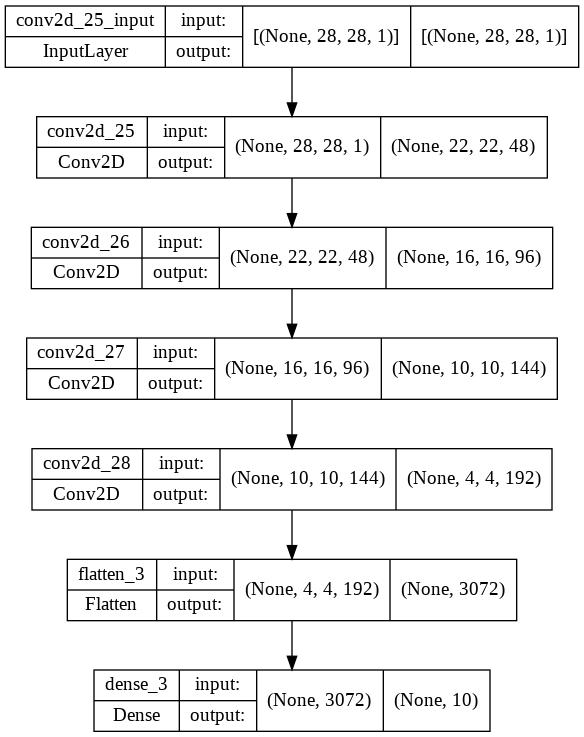

In [27]:
model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=5, batch_size=228, verbose=2, validation_split=None)

model3.summary()
model3.save('saved_models/model3.hdf5')
plot_model(model3, 'model3.jpg', show_shapes=True)

Ensembling 1 => M3+M3+M3 

Ensembling 2 => M5+M5+M5 

Ensembling 3 => M7+M7+M7 

Ensembling 4 => M3+M5+M7

printing the accuracies for all 3 models M3, M5 and M7 separately and also accuracies for ensembling 1, 2, 3 and 4 for test mnist fashion data 




In [29]:
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('saved_models/model1.hdf5')      # loading the saved models
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')


models1 = [model1, model1, model1]
models2 = [model2, model2, model2]
models3 = [model3, model3, model3]
models4 = [model1, model2, model3]


preds1 = [model.predict(x_test) for model in models1]
preds1=np.array(preds1)             # converting pred. into array
summed1= np.sum(preds1, axis=0)         # adding pred. of diff. models

ensemble_prediction1 = np.argmax(summed1, axis=1)    # prediction 

preds2 = [model.predict(x_test) for model in models2]
preds2=np.array(preds2)
summed2 = np.sum(preds2, axis=0)

ensemble_prediction2 = np.argmax(summed2, axis=1)

preds3 = [model.predict(x_test) for model in models3]
preds3=np.array(preds3)
summed3 = np.sum(preds3, axis=0)

ensemble_prediction3 = np.argmax(summed3, axis=1)

preds4 = [model.predict(x_test) for model in models4]
preds4=np.array(preds4)
summed4 = np.sum(preds4, axis=0)

ensemble_prediction4 = np.argmax(summed4, axis=1)


loss, accuracy1= model1.evaluate(x_test, y_test, verbose=0.0 )
loss, accuracy2= model2.evaluate(x_test, y_test, verbose=0.0 )
loss, accuracy3= model3.evaluate(x_test, y_test, verbose=0.0 )

ensemble_accuracy1= accuracy_score(y_test, ensemble_prediction1)
ensemble_accuracy2= accuracy_score(y_test, ensemble_prediction2)
ensemble_accuracy3= accuracy_score(y_test, ensemble_prediction3)
ensemble_accuracy4= accuracy_score(y_test, ensemble_prediction4)

# printing all accuracies together

print('Accuracy of model 1:', accuracy1*100)

print('Accuracy of model 2:', accuracy2*100)

print('Accuracy of model 3:', accuracy3*100)

print('Accuracy of ensemble(M3+M3+M3) is:', ensemble_accuracy1*100)

print('Accuracy of ensemble(M5+M5+M5) is:', ensemble_accuracy2*100)

print('Accuracy of ensemble(M7+M7+M7) is:', ensemble_accuracy3*100)

print('Accuracy of ensemble(M3+M5+M7) is:', ensemble_accuracy4*100)



Accuracy of model 1: 89.70000147819519
Accuracy of model 2: 90.0600016117096
Accuracy of model 3: 88.76000046730042
Accuracy of ensemble(M3+M3+M3) is: 89.7
Accuracy of ensemble(M5+M5+M5) is: 90.06
Accuracy of ensemble(M7+M7+M7) is: 88.75999999999999
Accuracy of ensemble(M3+M5+M7) is: 90.53


Previously we did ensembling for M3+M5+M7 but with equal weightage to all 3 models and now we will ensemble by giving best possible weights to all 3 models M3, M5 and M7 and find the test accuracy and we will compare it with results of ensembling 4 

In [42]:
models4 = [model1, model2, model3]

preds4 = [model.predict(x_test) for model in models4]
preds4=np.array(preds4)
weights=[0.4, 0.8, 0.3]      # providing weightage to M3, M5 and M7 

weighted_preds=np.tensordot(preds4, weights, axes=((0),(0)))
weighted_ensemble_prediction =np.argmax(weighted_preds, axis=1)

weighted_accuracy=accuracy_score(y_test, weighted_ensemble_prediction)

#  printing all the various accuracies again 

print('Accuracy of model 1:', accuracy1*100)

print('Accuracy of model 2:', accuracy2*100)

print('Accuracy of model 3:', accuracy3*100)

print('Accuracy of ensemble(M3+M5+M7) is:', ensemble_accuracy4*100)

print('Accuracy of weighted ensemble(0.4*M3+0.8*M5+0.3*M7) is:', weighted_accuracy*100)



Accuracy of model 1: 89.70000147819519
Accuracy of model 2: 90.0600016117096
Accuracy of model 3: 88.76000046730042
Accuracy of ensemble(M3+M5+M7) is: 90.53
Accuracy of weighted ensemble(0.4*M3+0.8*M5+0.3*M7) is: 90.53999999999999


Summary-- In report 3 it is said that, ensembling of different models can give you the better accuracy relative to accuracies of individual models and it is exactly what i showed in this code for the paper that we choose for our term project, as u can see accuracy of ensemble 4 if more than any individual model ( M3, M5 and M7) and further accuracy of weighted ensemble is better than all remaining and all results are for models without Batch Normalization only convolution layers and dense layers with suitable activation function 

Data -> MNIST fashion dataset 

Note-> if u don't get the same accuracies as shown above please train the models again and again by changing the learning rate boz i experinced the same thing when i run the code after some days, I changed the lr values to 1e-3, 1e-4, 1e-6 and finaly the values given above.

Also run the code in one go , boz the models which are saved in the folder of COLAB are temporary, they just vanish after some time or if u only run the code partially and remaining code after some time.

Also if u find any error/problem/dicrepancy b/w results of this code and results u are getting during runing the code please contact me  

